# Medical Appointment No Shows Analysis
<a id='Top'></a>

## Table of Contents
* [Introduction](#Introduction)
* [Data Dictionary](#Data-Dictionary)
* [Research questions](#Research-questions)
* [Data Wrangling](#Data-Wrangling)
* [Exploration Summery](#Exploration-Summery)
* [Data Cleaning](#Data-Cleaning)
* [Exploratory Data Analysis](#Exploratory-Data-Analysis)
* [Conclusion](#Conclusion)

## Introduction
<a id='Introduction'></a>
> A person makes a doctor appointment, receives all the instructions and no-show. Who to blame? This dataset collects information from 100k medical appointments in Brazil and is focused on the question of why 30% of patients miss their scheduled appointment. I am trying to analyse the most important reasons that affect the attendance of the patient.

## Data Dictionary
<a id='Data Dictionary'></a>
1. PatientId: Identification of a patient.
2. AppointmentID: Identification of each appointment.
3. Gender: Male or Female.
4. AppointmentDay: The day of the actuall appointment, when they have to visit the doctor.
5. ScheduledDay: The day someone called or registered the appointment, this is before appointment of course.
6. Age: How old is the patient.
7. Neighbourhood: Where the appointment takes place.
8. Scholarship: True of False, indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.
9. Hipertension: True or False.
10. Diabetes: True or False.
11. Alcoholism: True or False.
12. Handcap: True or False.
13. SMS_received: 1 or more messages sent to the patient.
14. No-show: True (if the patient did not show up), or False (if the patient did show up).


## Research questions:
<a id='Research-questions'></a>
- Q1: Do a patient's age and gender have a relationship with attendance for their appointment? What are the age groups affected by this?
- Q2: Does receiving a message affect the patient's attendance? 
- Q3: Does the due date affect the patient's attendance?
- Q4: Does the scholarship affect the patient's attendance? 
- Q5: Does having certain diseases affect attendance?
- Q6: What day of the week do patients attend and skip the most?

***

## Data Wrangling
<a id='Data-Wrangling'></a>
> In this section, we'd load our data from a CSV file to a pandas dataframe, and then take a quick dive into exploring the dataset and cleaning it for a better analysis.

In [1]:
# importing library
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading the csv file
df = pd.read_csv('KaggleV2-May-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


> Next, explore the dataset by checking data types, NaNs or duplicated rows, and any columns that may need to be dropped or parsed.

In [3]:
# review main info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


<div class="alert alert-block alert-warning">
<b>Observation:</b><br>     
<blockquote>  
1. There are no NaNs at all in our data.<br>    
2. We can drop PatientId and AppointmentId columns since they wouldn't be helpful during analysis.<br>    
3. ScheduledDay and AppointmentDay needs to be cast to date data type.<br>    
4. Gender needs to be converted into a category type.<br>    
5. Scholarship Hipertension Diabetes Alcoholism Handcap better to be boolean data type.<br>    
6. No-show needs to be parsed and cast to be boolean as well.<br></blockquote>    
</div>

In [4]:
# checking for duplicates
df.duplicated().sum()

0

In [5]:
# checking for null value
df.isnull().sum()   

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [6]:
# figuring out how big the dataset is
df.shape

(110527, 14)

<div class="alert alert-block alert-success">
<b>Found:</b></br>
<blockquote>the dataset has no no missing or duplicated data</blockquote>
</div>

In [7]:
# exploring the unique values of each column
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [8]:
# overveiw of statistics of the data
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


<div class = "alert alert-block alert-danger">
<b>Found:</b><br>
<blockquote>Handcap and Age columns has inconsistant unique values.<br>
SMS_received would be casted to boolean data type.</blockquote>
</di> 

In [9]:
# exploring handcap values
df['Handcap'].value_counts()

0    108286
1      2042
2       183
3        13
4         3
Name: Handcap, dtype: int64

<div class="alert alert-block alert-danger">
<b>Found:</b><br>
<blockquote>We'd be only intrested in rows with 0 or 1 values.</blockquote>
</div>

In [10]:
# exploring age column distribution
df['Age'].describe()

count    110527.000000
mean         37.088874
std          23.110205
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

<div class = "alert alert-block alert-danger">
<b>Found:</b><br>
<blockquote>Age column would need to be handled since it has a negative value.</blockquote>
</di> 

## Exploration Summery¶
<a id='Exploration-Summery'></a>
1. There are 110527 rows with 14 columns, and has no NaNs nor duplicated values in the dataset.
2. We can ignore or drop the PatientId and AppointmentId columns since wouldn't be helpful during analysis.
3. ScheduledDay and AppointmentDay needs to be cast to date data type.
4. Gender needs to be cast into a category type
5. Scholarship, Hipertension, Diabetes, Alcoholism, and SMS_recieved better be a boolean data type.
6. No-show column needs to be parsed and cast to boolean type.
7. Handcap column needs to be cleaned to have only 0 and 1 values.
8. Age column has inconsistent unique values that need to be handled.

***

## Data Cleaning
<a id='Data-Cleaning'></a>
> In this section, based on the previous findings to make analysis more accurate and clear.

<div class="alert alert-block alert-info">
<b>To-do:</b></br> 
<blockquote>Clean names of the columns and drop unnecessary columns</blockquote>
</div>

In [11]:
# Rename the error "Hipertension" to 'Hypertension'
df = df.rename(columns = {'Hipertension' : 'Hypertension'})

# Rename the error 'Handcap' to 'Handicap'
df = df.rename(columns = {'Handcap' : 'Handicap'})

# Rename the confusing 'No-show' to 'Absent'
df = df.rename(columns = {'No-show' : 'Absent'})

# Simplify 'SMS_received' to 'SMS'
df = df.rename(columns = {'SMS_received' : 'SMS'})

# Simplify 'Scholarship' to 'Bolsa'
df = df.rename(columns = {'Scholarship' : 'Bolsa'})

# dropping columns and validating changes
# df.drop(['PatientId', 'AppointmentID'], axis = 1, inplace = True)
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Bolsa', 'Hypertension',
       'Diabetes', 'Alcoholism', 'Handicap', 'SMS', 'Absent'],
      dtype='object')

<div class="alert alert-block alert-info">
<b>To-do:</b></br> 
<blockquote>Handling date data type.</blockquote>
</div>

In [12]:
df.AppointmentDay.unique

<bound method Series.unique of 0         2016-04-29T00:00:00Z
1         2016-04-29T00:00:00Z
2         2016-04-29T00:00:00Z
3         2016-04-29T00:00:00Z
4         2016-04-29T00:00:00Z
                  ...         
110522    2016-06-07T00:00:00Z
110523    2016-06-07T00:00:00Z
110524    2016-06-07T00:00:00Z
110525    2016-06-07T00:00:00Z
110526    2016-06-07T00:00:00Z
Name: AppointmentDay, Length: 110527, dtype: object>

<div class="alert alert-block alert-info">
<b>To-do:</b></br> 
<blockquote>All hours are set to 00:00:00, so let's extract only the year, month, and day data.</blockquote>
</div>

In [13]:
# extracting only day, month and year values
df['ScheduledDay'] = df['ScheduledDay'].str[:10]
df['AppointmentDay'] = df['AppointmentDay'].str[:10]

# changing data type
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

# confirming changes
print(df[['AppointmentDay', 'ScheduledDay']].dtypes)
df.head()

AppointmentDay    datetime64[ns]
ScheduledDay      datetime64[ns]
dtype: object


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Bolsa,Hypertension,Diabetes,Alcoholism,Handicap,SMS,Absent
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


<div class="alert alert-block alert-info">
<b>To-do:</b></br> 
<blockquote>Now, we'd move into appending a new column that holds appointment lead time.</blockquote>
</div>

In [14]:
# making new due days column
df['Due_days'] = df['AppointmentDay'] - df['ScheduledDay']

# converting data type 
df['Due_days'] = df['Due_days'].dt.days

# drop AppointmentDay col
df.drop(['ScheduledDay'], axis = 1, inplace = True)

<div class="alert alert-block alert-info">
<b>To-do:</b></br> 
<blockquote>We'll move into exploring this new column.</blockquote>
</div>

In [15]:
# viewing summery statistics
df['Due_days'].describe()

count    110527.000000
mean         10.183702
std          15.254996
min          -6.000000
25%           0.000000
50%           4.000000
75%          15.000000
max         179.000000
Name: Due_days, dtype: float64

<div class="alert alert-block alert-danger">
<b>Found:</b></br> 
<blockquote> We seem to have some negative values here, we'll drop them.</blockquote>
</div>

In [16]:
# viewing negative days values
df[df['Due_days'] < 0 ]

,PatientId,AppointmentID,Gender,AppointmentDay,Age,Neighbourhood,Bolsa,Hypertension,Diabetes,Alcoholism,Handicap,SMS,Absent,Due_days
27033,7.839273e+12,5679978,M,2016-05-09,38,RESISTÊNCIA,0,0,0,0,1,0,Yes,-1
55226,7.896294e+12,5715660,F,2016-05-17,19,SANTO ANTÔNIO,0,0,0,0,1,0,Yes,-1
64175,2.425226e+13,5664962,F,2016-05-04,22,CONSOLAÇÃO,0,0,0,0,0,0,Yes,-1
71533,9.982316e+14,5686628,F,2016-05-05,81,SANTO ANTÔNIO,0,0,0,0,0,0,Yes,-6
72362,3.787482e+12,5655637,M,2016-05-03,7,TABUAZEIRO,0,0,0,0,0,0,Yes,-1


In [17]:
# dropping these values and confirming changes
df.drop(df[df['Due_days'] < 0].index, inplace = True)
df['Due_days'].describe()

count    110522.000000
mean         10.184253
std          15.255115
min           0.000000
25%           0.000000
50%           4.000000
75%          15.000000
max         179.000000
Name: Due_days, dtype: float64

<div class="alert alert-block alert-info">
<b>To-do:</b></br> 
<blockquote>Next, appending a new column day of week.</blockquote>
</div>

In [18]:
# making a new column
df['Day_of_week'] = df['AppointmentDay'].dt.day_name()

In [19]:
# getting the number of records
df.Day_of_week.value_counts().to_frame(name='Number of Appointments')

,Number of Appointments
Wednesday,25866
Tuesday,25638
Monday,22714
Friday,19019
Thursday,17246
Saturday,39


<div class="alert alert-block alert-info">
<b>To-do:</b></br> 
<blockquote>Next, appending a new column age group.</blockquote>
</div>

In [20]:
# Adding age group
bins= [0,2,4,12,18,29,60,120]
labels = ['Infant','Toddler','Kid','Teen','Young_adult','Adult', 'Senior']
df['Age_group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

In [21]:
# getting the number of records
df.Age_group.value_counts().to_frame(name='Number of age group')

,Number of age group
Adult,46645
Senior,21172
Young_adult,15326
Kid,11000
Teen,7435
Infant,5812
Toddler,3131


<div class="alert alert-block alert-info">
<b>To-do:</b></br> 
<blockquote>Converting Gender and No-show to categorical variables.</blockquote>
</div>

In [22]:
# converting column and confirming changes
df['Gender'] = df['Gender'].astype('category')
df['Gender'].dtypes

CategoricalDtype(categories=['F', 'M'], ordered=False)

<div class="alert alert-block alert-info">
<b>To-do:</b></br> 
<blockquote>Converting Scholarship, Hipertension, Diabetes, Alcoholism, Handcap and SMS_recieved to boolean data type.</blockquote>
</div>

In [23]:
# converting columns to bool and confirming changes
cols = ['Bolsa', 'Hypertension', 'Diabetes', 'Alcoholism', 'SMS']
df[cols] = df[cols].astype('bool')
df[cols].dtypes

Bolsa           bool
Hypertension    bool
Diabetes        bool
Alcoholism      bool
SMS             bool
dtype: object

<div class="alert alert-block alert-info">
<b>To-do:</b></br> 
<blockquote>Parsing and casting No-show column.</blockquote>
</div>

In [24]:
# mapping alues to be more familiar
df.loc[df['Absent'] == 'Yes', 'Absent'] = 1
df.loc[df['Absent'] == 'No', 'Absent'] = 0

# casting dt type and confirming changes
df['Absent'] = df['Absent'].astype(bool)
df['Absent'].dtypes



dtype('bool')

<div class="alert alert-block alert-info">
<b>To-do:</b></br> 
<blockquote>Cleaning Handcap column.</blockquote>
</div>

In [25]:
# viewing rows with values of handicap > 1
df[df['Handicap'] > 1]

,PatientId,AppointmentID,Gender,AppointmentDay,Age,Neighbourhood,Bolsa,Hypertension,Diabetes,Alcoholism,Handicap,SMS,Absent,Due_days,Day_of_week,Age_group
946,7.282582e+13,5582483,M,2016-04-29,94,BELA VISTA,False,True,True,False,2,True,False,15,Friday,Senior
1665,1.242919e+13,5525497,M,2016-04-29,64,SANTA MARTHA,False,True,False,True,2,True,False,30,Friday,Senior
1666,1.242919e+13,5525498,M,2016-04-29,64,SANTA MARTHA,False,True,False,True,2,False,False,30,Friday,Senior
2071,1.242919e+13,5640120,M,2016-04-29,64,SANTA MARTHA,False,True,False,True,2,False,False,0,Friday,Senior
2091,1.491829e+13,5638626,F,2016-04-29,11,ANDORINHAS,False,False,False,False,2,False,False,0,Friday,Kid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108376,2.387212e+14,5756931,F,2016-06-07,44,ROMÃO,False,True,True,False,2,True,False,6,Tuesday,Adult
109484,3.589495e+14,5752442,M,2016-06-02,64,DA PENHA,False,True,True,False,2,False,False,2,Thursday,Senior
109733,5.662976e+14,5772744,F,2016-06-07,34,JUCUTUQUARA,False,False,False,False,2,True,False,4,Tuesday,Adult
109975,4.522185e+13,5766970,M,2016-06-06,39,PRAIA DO SUÁ,True,False,False,False,2,True,False,4,Monday,Adult


<div class="alert alert-block alert-info">
<b>To-do:</b></br> 
<blockquote>There are 199 rows with inconsistant values, we'd replace them with 1 to treat them as beeing handcaped.</blockquote>
</div>

In [26]:
# filling the bigger values with 1
df.loc[df['Handicap'].isin([2, 3, 4]), 'Handicap'] = 1

# casting type and confirming changes
df['Handicap'] = df['Handicap'].astype('bool')
df['Handicap'].unique()

array([False,  True])

<div class="alert alert-block alert-info">
<b>To-do:</b></br> 
<blockquote>There is one value with negative age, so we will drop it</blockquote>
</div>

In [27]:
#exploring values below 0
df[df['Age'] < 0]

,PatientId,AppointmentID,Gender,AppointmentDay,Age,Neighbourhood,Bolsa,Hypertension,Diabetes,Alcoholism,Handicap,SMS,Absent,Due_days,Day_of_week,Age_group
99832,4.659432e+14,5775010,F,2016-06-06,-1,ROMÃO,False,False,False,False,False,False,False,0,Monday,NaN


In [28]:
# dropping row with negative age and confirming changes
df.drop(df[df['Age'] < 0].index, inplace = True)
df[df['Age'] < 0]

,PatientId,AppointmentID,Gender,AppointmentDay,Age,Neighbourhood,Bolsa,Hypertension,Diabetes,Alcoholism,Handicap,SMS,Absent,Due_days,Day_of_week,Age_group


In [29]:
df.head()

,PatientId,AppointmentID,Gender,AppointmentDay,Age,Neighbourhood,Bolsa,Hypertension,Diabetes,Alcoholism,Handicap,SMS,Absent,Due_days,Day_of_week,Age_group
0,2.987250e+13,5642903,F,2016-04-29,62,JARDIM DA PENHA,False,True,False,False,False,False,False,0,Friday,Senior
1,5.589978e+14,5642503,M,2016-04-29,56,JARDIM DA PENHA,False,False,False,False,False,False,False,0,Friday,Adult
2,4.262962e+12,5642549,F,2016-04-29,62,MATA DA PRAIA,False,False,False,False,False,False,False,0,Friday,Senior
3,8.679512e+11,5642828,F,2016-04-29,8,PONTAL DE CAMBURI,False,False,False,False,False,False,False,0,Friday,Kid
4,8.841186e+12,5642494,F,2016-04-29,56,JARDIM DA PENHA,False,True,True,False,False,False,False,0,Friday,Adult


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110521 entries, 0 to 110526
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   PatientId       110521 non-null  float64       
 1   AppointmentID   110521 non-null  int64         
 2   Gender          110521 non-null  category      
 3   AppointmentDay  110521 non-null  datetime64[ns]
 4   Age             110521 non-null  int64         
 5   Neighbourhood   110521 non-null  object        
 6   Bolsa           110521 non-null  bool          
 7   Hypertension    110521 non-null  bool          
 8   Diabetes        110521 non-null  bool          
 9   Alcoholism      110521 non-null  bool          
 10  Handicap        110521 non-null  bool          
 11  SMS             110521 non-null  bool          
 12  Absent          110521 non-null  bool          
 13  Due_days        110521 non-null  int64         
 14  Day_of_week     110521 non-null  obj

<div class="alert alert-block alert-success">
<b>Sum up:</b></br>
<blockquote>There endded up with a datafram of 110526 rows and 12 columns, and everything looks tidy and clean. We'd proceed in visualizing it to extract meaningful insights from it.</blockquote>
</div>

***

## Exploratory Data Analysis
<a id='Exploratory-Data-Analysis'></a>
> Here, we are going to explore the dataset. The independent variable are age, gender, patients receiving SMS, appointment lead time, patients receiving Bolsa, having certain diseases, day of the week and our dependent variable is absentee of patients

### Q1: Do a patient's age and gender have a relationship with attendance for their appointment? What are the age groups affected by this?

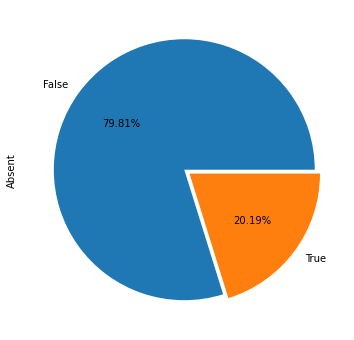

In [31]:
df['Absent'].value_counts().plot.pie(figsize=(6,6), autopct='%.2f%%', explode=(0, .05))
plt.show()

<div class="alert alert-block alert-success">
<b>Result:</b></br>
<blockquote>it is obvious that 79.8% of our patients did show up on their appointments and only 20.1% of them did not.</blockquote>
</div>

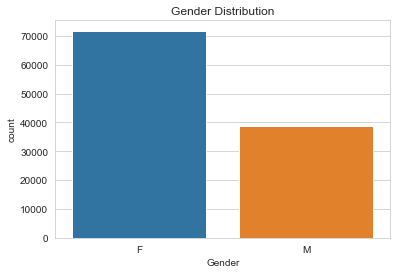

In [32]:
# setting seaborn configurations
sns.set_style("whitegrid")

# viewing count plot of gender distribution in our dataset
sns.countplot(x = 'Gender', data = df)
plt.title("Gender Distribution")
plt.show()

In [33]:
# pivot table
table=pd.pivot_table(df[df['Absent']==True],index=['Gender'],columns=['Age_group']
                     ,values=['AppointmentID'],aggfunc='count')

# add grand total
table['Grand total'] = table.sum(axis=1)
table

AppointmentID                                               \
Age_group        Infant Toddler   Kid  Teen Young_adult Adult Senior   
Gender                                                                 
F                   521     254  1125  1162        2788  6502   2239   
M                   533     275  1326   800        1004  2783   1002   

          Grand total  
Age_group              
Gender                 
F               14591  
M                7723

<AxesSubplot:>

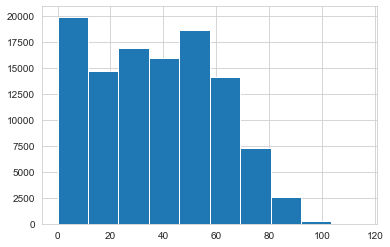

In [34]:
# ploting age destribution
df['Age'].hist()

<div class="alert alert-block alert-success">
<b>Result:</b></br>
<blockquote>We can notice that nearly half of our dataset consists of women with wider age distribution and achieves a rate higher than men across most of the age group.</blockquote>
</div>

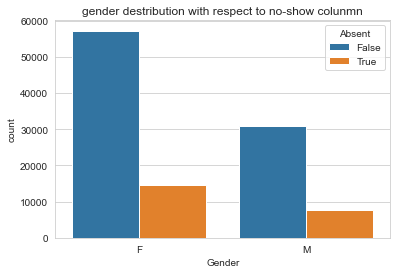

In [35]:
# showing the gender destribution with respect to the no-show colunmn
sns.countplot(x = 'Gender', data = df, hue = 'Absent')
plt.title('gender destribution with respect to no-show colunmn')
plt.show()

<div class="alert alert-block alert-success">
<b>Result:</b></br>
<blockquote>From the above chart, come up with a conclusion that women do show up on their appointments more often than men do, but this may be affected by the percentage of women on this dataset.</blockquote>
</div>

## Q2: Does receiving a message affect the patient's attendance?

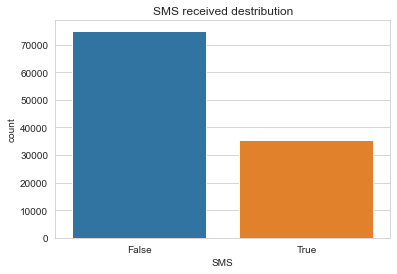

In [36]:
# viewing count plot of recieving SMS distribution in our dataset
sns.countplot(x = 'SMS', data = df)
plt.title("SMS received destribution")
plt.show()

In [37]:
df['SMS'].value_counts()

False    75039
True     35482
Name: SMS, dtype: int64

<div class="alert alert-block alert-success">
<b>Result</b></br>
<blockquote>There is 67.8% of the patients did not receive any SMS reminder of their appointments, could this be affecting their showing up?</blockquote>
</div>

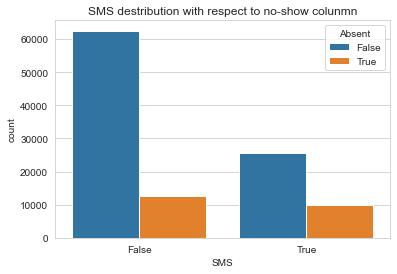

In [38]:
# showing the sms destribution with respect to the Absent colunmn
sns.countplot(x = 'SMS', data = df, hue = 'Absent')
plt.title('SMS destribution with respect to no-show colunmn')
plt.show()

<div class="alert alert-block alert-success">
<b>Result</b></br>
<blockquote>That's not quiet correct, as the the most patients did not receive any SMS reminder and yet they showed up on their appointments</blockquote>
</div>

## Q3: Does the appointment lead time affect the patient's attendance?

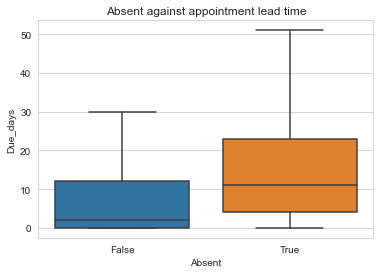

In [39]:
# viewing the correlation between no-show and due-days without outliers
sns.boxplot(x = 'Absent', y = 'Due_days', data = df, showfliers = False)
plt.title('Absent against appointment lead time')
plt.show()

<div class="alert alert-block alert-success">
<b>Result:</b></br>
<blockquote>It is clear that there is a correlation between number of appointment lead time and whether a patient shows up or not. Patient with appointments from 0 to 30 days tend to show up more regularly, while patients with higher number of days tend to not show up.</blockquote>
</div>

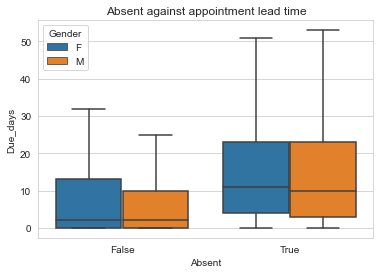

In [40]:
# viewing the correlation between no-show and due-days without outliers with respect to gender
sns.boxplot(x = 'Absent', y = 'Due_days', data = df, hue = 'Gender', showfliers = False)
plt.title('Absent against appointment lead time')
plt.show()

<div class="alert alert-block alert-success">
<b>Result:</b></br>
<blockquote>Gender does not affect number of appointment lead time and showing up at an appointment that much.</blockquote>
</div>

## Q4: Does the Bolsa affect the patient's attendance?

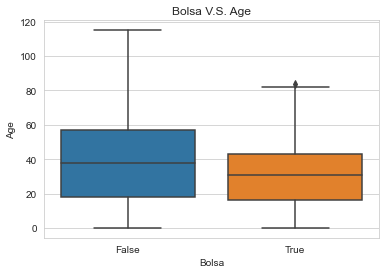

In [41]:
# plotting having a scholarship against age
sns.boxplot(x = 'Bolsa', y = 'Age', data = df)
plt.title('Bolsa V.S. Age')
plt.show()

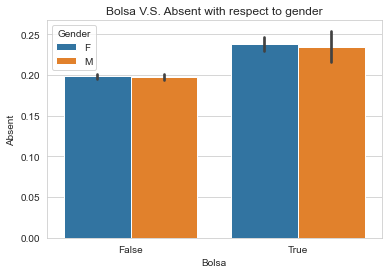

In [42]:
# plotting having a scholarship against no show with respect to gender
sns.barplot(x = 'Bolsa', y = 'Absent', hue = 'Gender', data = df)
plt.title('Bolsa V.S. Absent with respect to gender')
plt.show()

<div class="alert alert-block alert-success">
<b>Result:</b></br>
<blockquote>Lets dive deeper to see if this is related to gender. We can see that having a Bolsa does not affect showing up to a doctor appointment that much and that huge age group is enrolled to that Bolsa and also many are babies enrolled as well.</blockquote>
</div>

## Q5: Does having certain diseases affect attendance?

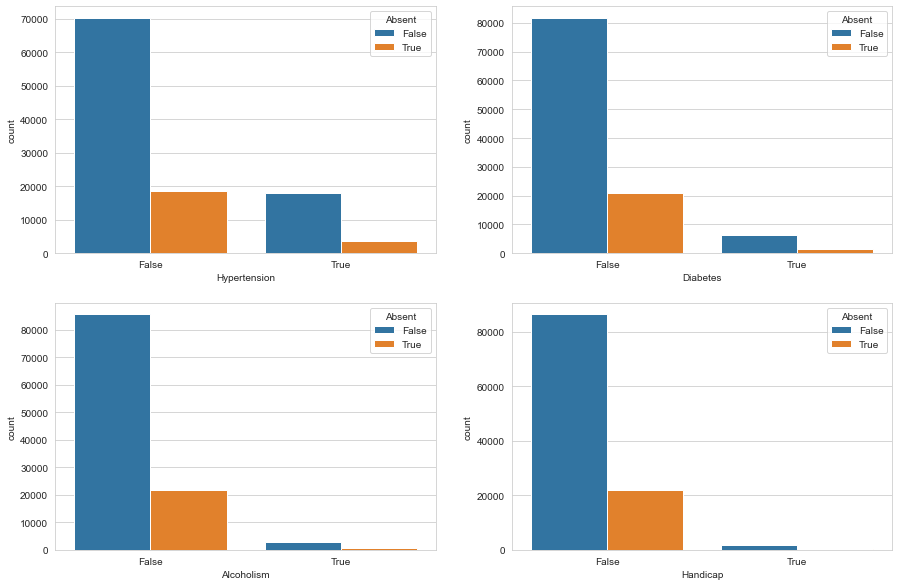

In [43]:
# plotting deseases against no show
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.countplot(x = 'Hypertension', data = df, hue= 'Absent')
plt.subplot(2,2,2)
sns.countplot(x = 'Diabetes', data = df, hue= 'Absent')
plt.subplot(2,2,3)
sns.countplot(x = 'Alcoholism', data = df, hue= 'Absent')
plt.subplot(2,2,4)
sns.countplot(x = 'Handicap', data = df, hue= 'Absent')
plt.show()

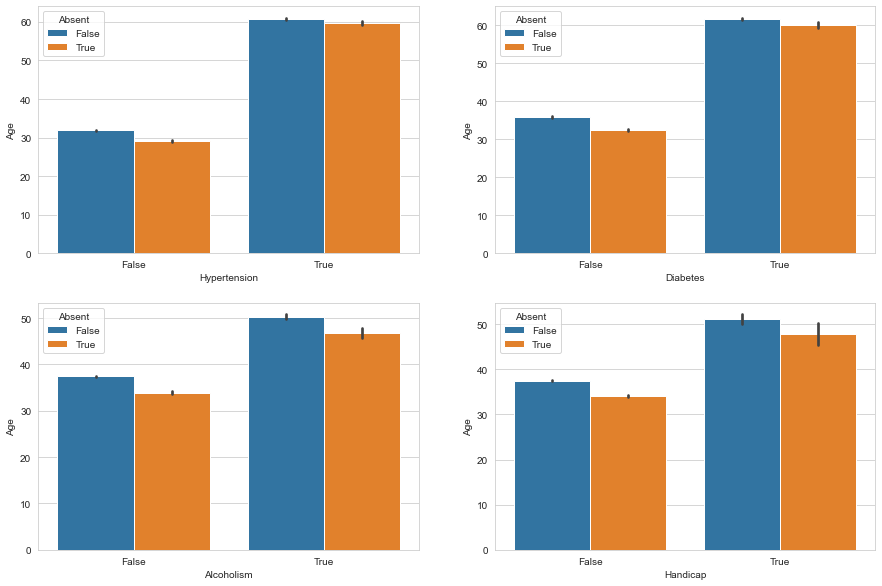

In [44]:
# plotting deseases against no show with respect to age
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.barplot(x = 'Hypertension', y = 'Age', data = df, hue= 'Absent')
plt.subplot(2,2,2)
sns.barplot(x = 'Diabetes', y = 'Age', data = df, hue= 'Absent')
plt.subplot(2,2,3)
sns.barplot(x = 'Alcoholism', y = 'Age', data = df, hue= 'Absent')
plt.subplot(2,2,4)
sns.barplot(x = 'Handicap', y = 'Age', data = df, hue= 'Absent')
plt.show()

<div class="alert alert-block alert-success">
<b>Result:</b></br>
<blockquote>From above graphs, we can conclude that the vast majority of the dataset does not have chronic deseases. But, they are still existed in many young people. Having a chronic deseas may affect people showing up at a appointment.</blockquote>
</div>

## Q6: What day of week do patients attend and skip the most?

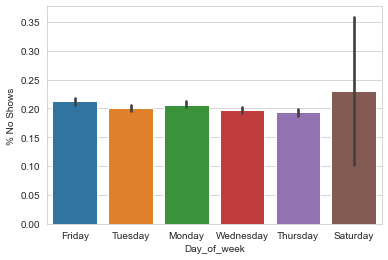

In [45]:
# Ploot the average no shows for each day of the week.
ax = sns.barplot(x=df.Day_of_week, y=df.Absent)
ax.set(ylabel='% No Shows')
plt.show()

<div class="alert alert-block alert-success">
<b>Result:</b></br>
<blockquote>There appear to be higher incidences of no shows on Saturdays and Fridays. The error bar is also highest for Saturdays due to the extremely low incidence of Saturday appointments.</blockquote>
</div>

In [46]:
# first I need to create a new dataset with patients who attended an appointment by day of the week
absent = df.query('Absent == True').AppointmentDay.dt.day_of_week.value_counts()
absent.sort_index(inplace=True)
absent

0    4689
1    5150
2    5092
3    3337
4    4037
5       9
Name: AppointmentDay, dtype: int64

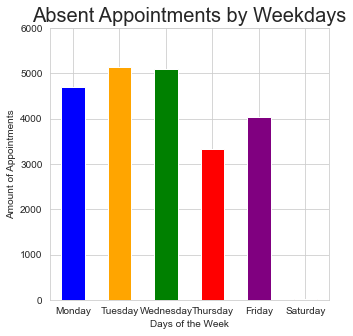

In [47]:
# plotting the findings
absent.plot.bar(figsize=(5,5), color=('blue', 'orange', 'green', 'red', 'purple', 'brown'))
plt.ylim(top=6000)
plt.title("Absent Appointments by Weekdays", {'fontsize' : 20})
plt.xlabel("Days of the Week")
plt.ylabel("Amount of Appointments")
plt.xticks(np.arange(6), ('Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'), rotation=0);  

<div class="alert alert-block alert-success">
<b>Result:</b></br>
<blockquote>This graph follows the same trend as the attended appointments bar chart. Obvisously, Wednesday was the highest for attended appointments. Tuesday is the highest day to be absent at 5150. Saturday is the lowest at 9 appointments.</blockquote>
</div>

In [48]:
# percentage of absents
absent = absent / sum(absent) * 100
absent

0    21.013713
1    23.079681
2    22.819754
3    14.954737
4    18.091781
5     0.040333
Name: AppointmentDay, dtype: float64

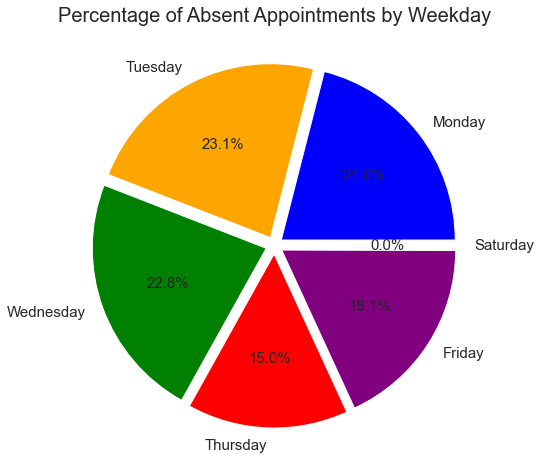

In [49]:
# plotting pie chart
names=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
explode = (0.05,0.05,0.05,0.05,0.05,0.05)
colors = ('blue', 'orange', 'green', 'red', 'purple', 'brown')
absent.plot(kind='pie', autopct='%1.1f%%', explode=explode, labels=names,colors=colors,figsize=(10,8), fontsize=15)
plt.title("Percentage of Absent Appointments by Weekday", {'fontsize' : 20})
plt.ylabel("");


<div class="alert alert-block alert-success">
<b>Result:</b></br>
<blockquote>From the previous pie chart, Tuesday has the highest absent record for appointments at 23.1% and closely followed by Wednesday at 22.8%. Saturday's proportion is so little that it does not show up, but makes up about.04% of absent appointments. Thursday is still the second lowest at 15.0%.</blockquote>
</div>

## Conclusion¶
<a id='Conclusion'></a>

### Q1:  Do a patient's age and gender have a relationship with attendance for their appointment? What are the age groups affected by this?
There are total 79.8% of the patients did show up on their appointments and only 20.1% of them did not. We tried to figure out if there was any relation between gender and age and absent. We started the analysis by comparing the proportion of men and women in the dataset, and we found that Female is the greater proportion comparing to men, that means women take more care of their health in comparison to men. We provided more analysis to see if there is a relation between gender and age and absent the results shows thar there is no relation betwen the two variables.

### Q2: Does receiving a message affect the patient's attendance?
The relationship between SMS and absent was contrary to what was expected. There 67.8% of the patients did not reciee any SMS reminder of their appointments, but they still showed up on their appointments. 

### Q3: Does the appointment lead time affect the patient's attendance?
There is a positive correlation between appointment lead time and whether a patient absent. Also, patient with appointments from 0 to 30 days tend to show up more regularly, while patients with higher number of days tend to not show up. Gender does not affect that much.

### Q4: Does the Bolsa affect the patient's attendance?
Having a Bolsa does not affect showing up to a doctor appointment that much. Many people enrolled to that Bolsa including their babies as well.

### Q5: Does having certain diseases affect attendance?
Although the vast majority of the dataset does not have chronic diseases, they are existed in so many young people. Having a chronic disease may affect your showing up at a appointment.

### Q6: What day of week do patients attend and skip the most?¶
The day of week may be resulting people absent, since certain days of the week were linked to higher occurrences of absent. Wednesday is the most likely day for a patient to absent to an appointment. Saturday is the least likely day for a scheduled appointment. Thursday is the least likely weekday for a scheduled appointment.

## Further Research

> 1. We can investigate neighbourhood data to see if the distance making influence with absent or not.
> 2. We also can check if patients overbooking appointments which may cause lot of absent

<button type="button" style="font: bold 14px Arial">[Back to Top](#Top)</button>